In [2]:
import matplotlib.pyplot as plt
import torch
from utils_2d.data_utils import *
import numpy as np
import pandas as pd
import seaborn as sns
import os

cwd = os.getcwd()

### load data
# npy_name = cwd + '/figs/CM_type_PV_problem_1.npy'
# fig_name = cwd + '/figs/CM_type_PV_problem_1.png'
# fig_name_ins = cwd + '/figs/CM_ins_type_PV_problem_1.png'

npy_name = cwd + '/result/CM_type_WD_problem_1.npy'
fig_name = cwd + '/figs/CM_type_WD_problem_1.png'
fig_name_ins = cwd + '/figs/CM_ins_type_WD_problem_1.png'


bs = 16
with open(npy_name, 'rb') as ss:
    cc = np.load(ss)
    pd_32 = np.load(ss)
    pd_64 = np.load(ss)
    pd_128 = np.load(ss)
    pd = np.load(ss)
    c = np.load(ss)
    c_up = np.load(ss)
    ref = np.load(ss)
    
c, c_up, pd, ref = c[:bs, ...], c_up[:bs, ...], pd[:bs, ...], ref[:bs, ...]

In [3]:
mk = 80

pd_tvd_vec = compute_TVD_vector(pd, ref)
pd_rmse_vec = get_relative_l2_vector(pd, ref)
pd_melru_vec, pd_melrw_vec = get_MELR_vector(pd, ref, max_k=mk)

c_tvd_vec = compute_TVD_vector(c, ref)
c_rmse_vec = get_relative_l2_vector(c, ref)
c_melru_vec, c_melrw_vec = get_MELR_vector(c, ref, max_k=mk)


c_up_tvd_vec = compute_TVD_vector(c_up, ref)
c_up_rmse_vec = get_relative_l2_vector(c_up, ref)
c_up_melru_vec, c_up_melrw_vec = get_MELR_vector(c_up, ref, max_k=mk)


print(pd_tvd_vec.shape, pd_rmse_vec.shape, pd_melru_vec.shape, pd_melrw_vec.shape)

(16,) (16,) (16,) (16,)


In [16]:
import pandas as pdas
import numpy as np

mulp = 1/5

# Flatten the vectors into a single list
values = np.concatenate([
    c_rmse_vec, c_tvd_vec, c_melru_vec*mulp, c_melrw_vec,
    c_up_rmse_vec, c_up_tvd_vec, c_up_melru_vec*mulp, c_up_melrw_vec,
    pd_rmse_vec, pd_tvd_vec, pd_melru_vec*mulp, pd_melrw_vec
])

# Repeat the class and metric labels appropriately
classes = (["LFLR+Interp"] * bs*4 + ["LFLR+SR"] * bs*4 + ["DCSR"] * bs*4)
metrics = ([r'RMSE$\downarrow$'] * bs + [r'TVD$\downarrow$'] * bs + [r'MELRu$\downarrow$'] * bs + [r'MELRw$\downarrow$'] * bs) * 3

# Create the DataFrame
data = {
    "Class": classes,
    "Metric": metrics,
    "Value": values
}

df = pdas.DataFrame(data)

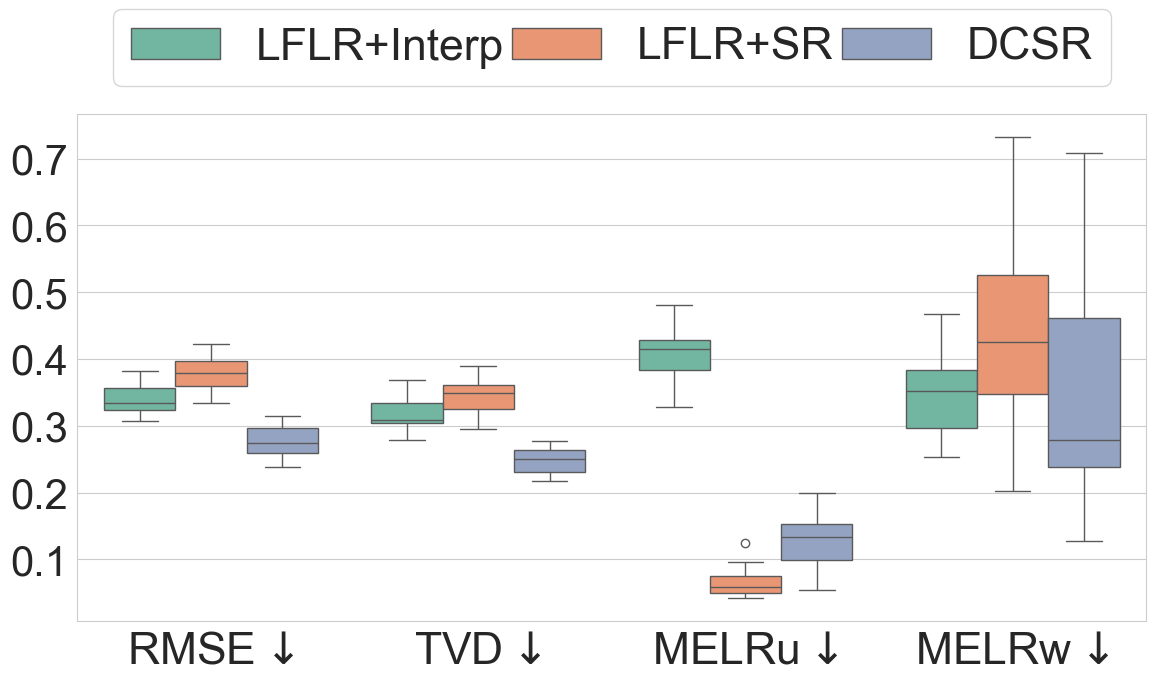

In [17]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Metric",
    y="Value",
    hue="Class",
    data=df,
    palette="Set2",
    width=0.8
)

# Customize the plot
#plt.title("Comparison Across Methods and Metrics", fontsize=28)
plt.xlabel("")
plt.ylabel("")
#plt.legend(title="Method", fontsize=24, title_fontsize=28)
plt.legend(loc='upper left', fontsize=38)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=32, columnspacing=0.2) 
#plt.legend([], [], frameon=False)
plt.xticks(fontsize=32)
plt.yticks(fontsize=30)
#plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig(fig_name, bbox_inches='tight')
plt.show()

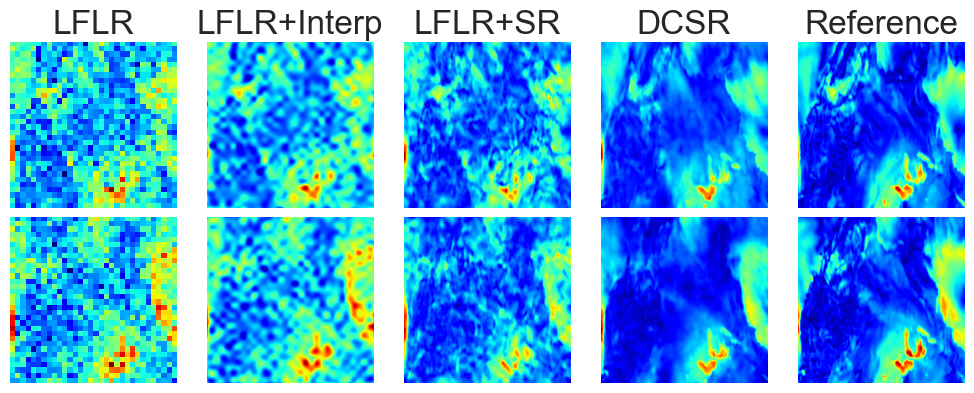

In [5]:
nrows, bs_plt = 5, 2
fig2, ax = plt.subplots(bs_plt, nrows, figsize=(nrows * 2, bs_plt * 2))
for i in range(bs_plt):
    # ax[i, 0].contourf(xx_0, yy_0, cc[i, ..., 0], 12, cmap=cm.jet)
    # ax[i, 1].contourf(xx, yy, c_256[i, ..., 0], 12, cmap=cm.jet)
    # ax[i, 2].contourf(xx, yy, c_up_256[i, ..., 0], 12, cmap=cm.jet)
    # ax[i, 3].contourf(xx, yy, pd_256[i, ..., 0], 12, cmap=cm.jet)
    # ax[i, 4].contourf(xx, yy, real_256[i, ..., 0], 12, cmap=cm.jet)
    ax[i, 0].imshow(cc[i, ..., 0], cmap=cm.jet)
    ax[i, 1].imshow(c[i, ..., 0], cmap=cm.jet)
    ax[i, 2].imshow(c_up[i, ..., 0], cmap=cm.jet)
    ax[i, 3].imshow(pd[i, ..., 0], cmap=cm.jet)
    ax[i, 4].imshow(ref[i, ..., 0], cmap=cm.jet)

    ax[0, 0].set_title('LFLR', fontsize=24)
    ax[0, 1].set_title('LFLR+Interp', fontsize=24)
    ax[0, 2].set_title('LFLR+SR', fontsize=24)
    ax[0, 3].set_title('DCSR', fontsize=24)
    ax[0, 4].set_title('Reference', fontsize=24)

    for axs in ax.flat:
        axs.set_xticks([])
        axs.set_yticks([])
        axs.axis('off')
        
plt.tight_layout()
fig2.savefig(fig_name_ins, bbox_inches='tight')


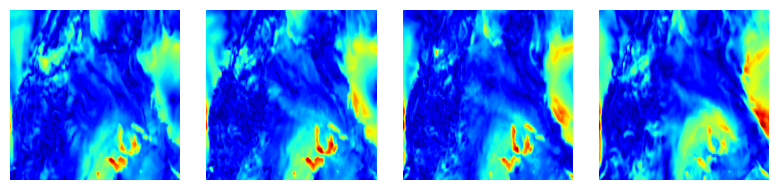

In [10]:
nrows, bs_plt = 1, 4
fig3, ax = plt.subplots(1, bs_plt, figsize=(bs_plt * 2, nrows * 2))
for i in range(bs_plt):
    ax[i].imshow(ref[i, ..., 0], cmap=cm.jet)
for axs in ax.flat:
        axs.set_xticks([])
        axs.set_yticks([])
        axs.axis('off')
plt.tight_layout()
plt.show()
fig3.savefig('cm_demo.png', bbox_inches='tight')